In [29]:
import pandas as pd
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#load csv containing return data on assets
assets = pd.read_csv('mtkl.csv',header='infer',index_col='data') 
assset =assets.head(5)

In [30]:
returns = (assets*0.98/assets.shift(1))-1
returns.head()

,bitebi,gold
data,,
2016.9.12,NaN,NaN
2016.9.13,0.057338,-0.021182
2016.9.14,-0.058092,-0.021433
2016.9.15,0.062751,-0.021727
2016.9.16,-0.059765,-0.021600


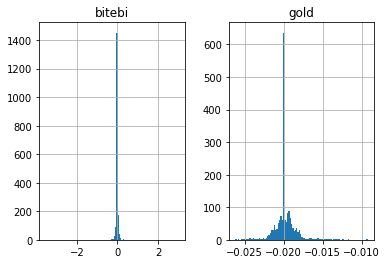

In [31]:
returns.hist(bins=100)
plt.show()

In [32]:
log_returns = np.log((assets/assets.shift(1)))

In [33]:
log_returns = np.log((assets/assets.shift(1)))

In [34]:
log_returns = np.log((assets/assets.shift(1)))

In [35]:
log_returns.cov()*252

,bitebi,gold
bitebi,2.116973,0.001268
gold,0.001268,0.000530


In [36]:
log_returns.cov()*252

,bitebi,gold
bitebi,2.116973,0.001268
gold,0.001268,0.000530


In [37]:
number_assets = len(assets.columns)
Rf = .015
weight_log=[]
port_info = np.zeros((3,25000))
for x in range(25000):   
    weights = np.random.random(number_assets)
    weights /= np.sum(weights)
    weight_log.append(weights)
    pret = np.sum(weights*log_returns.mean())*252
    pvol = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252, weights)))
    port_info[0,x] = pvol
    port_info[1,x] = pret
    port_info[2,x] =(pret - Rf)/pvol
    
port_info,weight_log 

(array([[0.35950969, 0.55418387, 0.65092597, ..., 0.51571372, 0.2067517 ,
         0.1966784 ],
        [0.15510749, 0.21661845, 0.24716768, ..., 0.204468  , 0.10673207,
         0.10353253],
        [0.38971826, 0.36381147, 0.35667295, ..., 0.36738987, 0.4436823 ,
         0.45013856]]),
 [array([0.24634946, 0.75365054]),
  array([0.38038974, 0.61961026]),
  array([0.44696045, 0.55303955]),
  array([0.86678022, 0.13321978]),
  array([0.73139646, 0.26860354]),
  array([0.47006211, 0.52993789]),
  array([0.41139184, 0.58860816]),
  array([0.35024466, 0.64975534]),
  array([0.6843529, 0.3156471]),
  array([0.60446013, 0.39553987]),
  array([0.57649169, 0.42350831]),
  array([0.43148317, 0.56851683]),
  array([0.60003206, 0.39996794]),
  array([0.86728747, 0.13271253]),
  array([0.49103382, 0.50896618]),
  array([0.82596542, 0.17403458]),
  array([0.34721953, 0.65278047]),
  array([0.30074248, 0.69925752]),
  array([0.41646909, 0.58353091]),
  array([0.69012725, 0.30987275]),
  array([0.3

In [38]:
max_sharpe_idx = np.argmax(port_info[2])
sdp, rp = port_info[0,max_sharpe_idx], port_info[1,max_sharpe_idx]
max_sharpe_allocation = pd.DataFrame(weight_log[max_sharpe_idx],index=returns.columns,columns=['allocation'])
max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
max_sharpe_allocation = max_sharpe_allocation.T

min_vol_idx = np.argmin(port_info[0])
sdp_min, rp_min = port_info[0,min_vol_idx], port_info[1,min_vol_idx]
min_vol_allocation = pd.DataFrame(weight_log[min_vol_idx],index=returns.columns,columns=['allocation'])
min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
min_vol_allocation = min_vol_allocation.T

max_sharpe_allocation,min_vol_allocation

(            bitebi   gold
 allocation    0.39  99.61,
             bitebi   gold
 allocation     0.0  100.0)

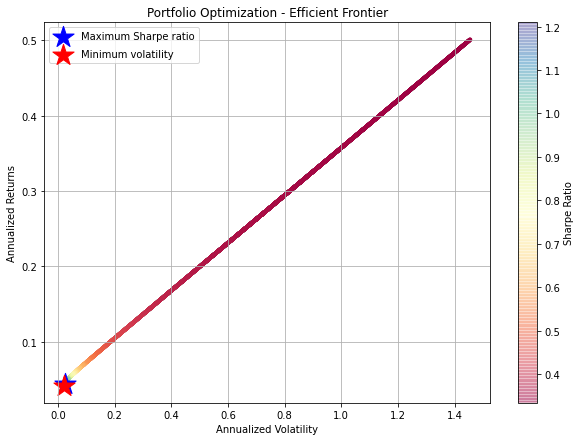

In [39]:
plt.figure(figsize=(10, 7))
plt.scatter(port_info[0,:],port_info[1,:],c=port_info[2,:],cmap='Spectral', marker='o', s=10, alpha=0.3)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(sdp,rp,marker='*',color='b',s=500, label='Maximum Sharpe ratio')
plt.scatter(sdp_min,rp_min,marker='*',color='r',s=500, label='Minimum volatility')
plt.title('Portfolio Optimization - Efficient Frontier')
plt.grid(True)
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Returns')
plt.legend(labelspacing=0.8)
plt.show()